In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
%matplotlib inline

# Modeling #1 flow :

   ### Cross Validation -> Model Performance 측정 -> Model Tuning -> Test 데이터 모델 적용 후 Kaggle 제출

* 각 모델 별 Cross Validation 성능 확인 후 성능 좋은 모델 선택
    * Multinomial NB
    * Bernoulli NB
    * Gaussian NB
    * LogisticRegression


* Performance 측정
    * ROC Curve
    * ROC-AUC Area
    * Accuracy
    * Classification Report(precision, Recall, F1-Score)


* GridSearch 이용 -> Parameter 튜닝

* Test Data 모델 적용 -> Kaggle 제출

In [2]:
# 데이터 불러오기

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
Big_df = pd.read_pickle('save_preprocessing_1.pkl')
Big_df.head()

,Parch,Embarked_C,Embarked_S,Embarked_Q,First_Class,Second Class,Third Class,Age_adult,Age_children,Age_senior,Age_teenage,Male,Female
0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
1,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0
3,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0


In [3]:
# Big_df : Train, Test 데이터로 나누기

final_train_df = Big_df.iloc[:train_df.shape[0]]
target = train_df['Survived']
final_test_df = Big_df.iloc[train_df.shape[0]:]
final_test_df.index = test_df.index

In [4]:
final_train_df.head()

,Parch,Embarked_C,Embarked_S,Embarked_Q,First_Class,Second Class,Third Class,Age_adult,Age_children,Age_senior,Age_teenage,Male,Female
0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
1,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0
3,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(final_train_df.as_matrix(), target.as_matrix(), test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 13), (712,), (179, 13), (179,))

In [6]:
# 각 모델 별 학습시키기

mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
lr = LogisticRegression()

mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
print(classification_report(y_test, mnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.86      0.86       108
          1       0.79      0.77      0.78        71

avg / total       0.83      0.83      0.83       179



In [8]:
print(classification_report(y_test, bnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       108
          1       0.82      0.76      0.79        71

avg / total       0.84      0.84      0.84       179



In [9]:
print(classification_report(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       108
          1       0.74      0.76      0.75        71

avg / total       0.80      0.80      0.80       179



In [10]:
print(classification_report(y_test, lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       108
          1       0.83      0.75      0.79        71

avg / total       0.84      0.84      0.84       179



In [11]:
def cross_validation_score(model, X, y, model_label, cv_methods=KFold(n_splits=5)):
    for _, (clf, label) in enumerate(zip(model, model_label)):
        scores = cross_val_score(clf, X, y, cv=cv_methods, scoring='accuracy', n_jobs=-1)
        print('[{}] Model Accuracy Score : {:0.3f} +/- {:0.3f}'.format(label, np.mean(scores), np.std(scores)))
        
model = [mnb, bnb, gnb, lr]
model_label = ['MultinomialNB', 'BernoulliNB', 'GaussianNB', 'LogisticRegression']
cross_validation_score(model, final_train_df, target, model_label)

[MultinomialNB] Model Accuracy Score : 0.785 +/- 0.020
[BernoulliNB] Model Accuracy Score : 0.779 +/- 0.025
[GaussianNB] Model Accuracy Score : 0.705 +/- 0.152
[LogisticRegression] Model Accuracy Score : 0.798 +/- 0.025


### ROC Curve 시각화

In [12]:
y_real = y_test
scores_mnb = mnb.predict_proba(X_test)[:, 1]
scores_bnb = bnb.predict_proba(X_test)[:, 1]
scores_gnb = gnb.predict_proba(X_test)[:, 1]
scores_lr = lr.predict_proba(X_test)[:, 1]

fpr_mnb, tpr_mnb, threshold = roc_curve(y_real, scores_mnb)
fpr_bnb, tpr_bnb, threshold = roc_curve(y_real, scores_bnb)
fpr_gnb, tpr_gnb, threshold = roc_curve(y_real, scores_gnb)
fpr_lr, tpr_lr, threshold = roc_curve(y_real, scores_lr)

roc_auc_mnb = roc_auc_score(y_real, scores_mnb)
roc_auc_bnb = roc_auc_score(y_real, scores_bnb)
roc_auc_gnb = roc_auc_score(y_real, scores_gnb)
roc_auc_lr = roc_auc_score(y_real, scores_lr)

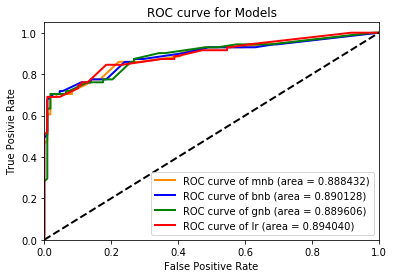

In [13]:
plt.figure()
plt.plot(fpr_mnb, tpr_mnb, color='darkorange',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('mnb', roc_auc_mnb))
plt.plot(fpr_bnb, tpr_bnb, color='blue',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('bnb', roc_auc_bnb))
plt.plot(fpr_gnb, tpr_gnb, color='green',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('gnb', roc_auc_gnb))
plt.plot(fpr_lr, tpr_lr, color='red',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('lr', roc_auc_lr))
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Posivie Rate')
plt.title('ROC curve for Models')
plt.legend(loc='lower right')
plt.show()

In [14]:
def using_metric(y_true, y_pred, model_label):
    c_m = confusion_matrix(y_true, y_pred)
    
    tp = set((np.where(y_true==1)[0]).tolist()) & set((np.where(y_pred==1)[0]).tolist())
    fn = set((np.where(y_true==1)[0]).tolist()) & set((np.where(y_pred==0)[0]).tolist())
    fp = set((np.where(y_true==0)[0]).tolist()) & set((np.where(y_pred==1)[0]).tolist())
    tn = set((np.where(y_true==0)[0]).tolist()) & set((np.where(y_pred==0)[0]).tolist())
    
    accuracy = (len(tp) + len(tn)) / (len(tp) + len(fn) + len(fp) + len(tn)) # accuracy_score로 가능
    precision = len(tp) / (len(tp) + len(fp))                                # precision_score로 가능
    recall = len(tp) / (len(tp) + len(fn))                                   # recall_score로 가능
    specificity = len(tn) / (len(fp) + len(tn))                              
    fallout = len(fp) / (len(fp) + len(tn))
    
    print('Using {1} of Confusion matrix :\n {0}'.format(c_m, model_label))
    print()
    print('True Positive  : {}'.format(len(tp)), 'False Negative : {}'.format(len(fn)))
    print('False Positive : {}'.format(len(fp)), 'True Negative  : {}'.format(len(tn)))
    print()
    print('Accuracy    : {:.3f}'.format(accuracy), 'Precision : {:.3f}'.format(precision), 'Recall : {:.3f}'.format(recall))
    print('Specificity : {:.3f}'.format(specificity), 'Fallout : {:.3f}'.format(fallout))

using_metric(y_real, lr.predict(X_test), 'LogisticRegression')

Using LogisticRegression of Confusion matrix :
 [[97 11]
 [18 53]]

True Positive  : 53 False Negative : 18
False Positive : 11 True Negative  : 97

Accuracy    : 0.838 Precision : 0.828 Recall : 0.746
Specificity : 0.898 Fallout : 0.102


* Parameter 정보

   * C : float, default: 1.0, 1/lambda : L1 or L2 Penalty에서 lambda의 역할 => hyperparameter
       * hyperparameter : 학습하는 과정에서 모델이 결정하는 parameter가 아닌 사람들이 정해야 할 parameter
       
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. (#Scikit-Learn 문서 참고)

   * Penalty l1 : Ridge Regularization : 가중치들의 제곱합을 최소화 하는 것을 추가 제약 조건으로 함. lambda * sum of squared weights
   * Penalty l2 : Lasso Regularization : 가중치들의 절대값의 합을 최소화 하는 것을 추가 제약 조건으로 함. lambda * sum of absolute weights

In [15]:
def grid_search(X, y, clf, parameters, n_jobs=-1, cv=5):
    gs_clf = GridSearchCV(clf, parameters, n_jobs = n_jobs, cv = cv, scoring='accuracy')
    gs_clf = gs_clf.fit(X, y)
    print('Best Parameter :', gs_clf.best_params_)
    print('Model Score : {}'.format(gs_clf.best_score_))
parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100], # 작을수록 정규화 정도가 강함 1/lambda
}
grid_search(final_train_df, target, lr, parameters)

Best Parameter : {'C': 0.001, 'penalty': 'l2'}
Model Score : 0.8024691358024691


# Test Data 적용

In [16]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
final_clf = LogisticRegression(C=0.001, penalty='l2')
final_clf.fit(final_train_df, target)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'],
                           'Survived' : final_clf.predict(final_test_df)})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [19]:
#submission.to_csv('submission.csv', index=False)

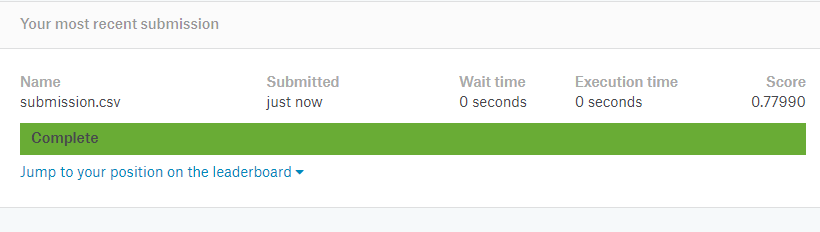

# Modeling #2 Flow
### Cross Validation -> Performance 측정 -> Model Tuning -> Test 데이터 모델 적용 후 Kaggle 제출

* Modeling 1 과정과 동일

In [20]:
Big_df2 = pd.read_pickle('save_preprocessing_2.pkl')
Big_df2.head()

,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Segmentation_nonadult,Age_Segmentation_adult
0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0
1,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
2,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0
3,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
4,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0


In [21]:
final_train_df_pre2 = Big_df2.iloc[:train_df.shape[0]]
final_test_df_pre2 = Big_df2.iloc[train_df.shape[0]:]
final_test_df_pre2.index = test_df.index

In [22]:
X_train, X_test, y_train, y_test = train_test_split(final_train_df_pre2.as_matrix(), target.as_matrix(), test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 11), (712,), (179, 11), (179,))

In [23]:
# 각 모델 별 학습시키기

mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
lr = LogisticRegression()

mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print(classification_report(y_test, mnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.75      0.78       104
          1       0.69      0.76      0.72        75

avg / total       0.76      0.75      0.76       179



In [25]:
print(classification_report(y_test, bnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79       104
          1       0.70      0.76      0.73        75

avg / total       0.76      0.76      0.76       179



In [26]:
print(classification_report(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.74      0.77       104
          1       0.68      0.76      0.72        75

avg / total       0.76      0.75      0.75       179



In [27]:
print(classification_report(y_test, lr.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       104
          1       0.77      0.72      0.74        75

avg / total       0.79      0.79      0.79       179



In [28]:
# 위에 있는 cross_validation_score 함수 이용

model = [mnb, bnb, gnb, lr]
model_label = ['MultinomialNB', 'BernoulliNB', 'GaussianNB', 'LogisticRegression']
cross_validation_score(model, final_train_df_pre2, target, model_label)

[MultinomialNB] Model Accuracy Score : 0.778 +/- 0.020
[BernoulliNB] Model Accuracy Score : 0.778 +/- 0.024
[GaussianNB] Model Accuracy Score : 0.774 +/- 0.020
[LogisticRegression] Model Accuracy Score : 0.789 +/- 0.025


### ROC Curve 시각화

In [29]:
y_real = y_test
scores_mnb = mnb.predict_proba(X_test)[:, 1]
scores_bnb = bnb.predict_proba(X_test)[:, 1]
scores_gnb = gnb.predict_proba(X_test)[:, 1]
scores_lr = lr.predict_proba(X_test)[:, 1]

fpr_mnb, tpr_mnb, threshold = roc_curve(y_real, scores_mnb)
fpr_bnb, tpr_bnb, threshold = roc_curve(y_real, scores_bnb)
fpr_gnb, tpr_gnb, threshold = roc_curve(y_real, scores_gnb)
fpr_lr, tpr_lr, threshold = roc_curve(y_real, scores_lr)

roc_auc_mnb = roc_auc_score(y_real, scores_mnb)
roc_auc_bnb = roc_auc_score(y_real, scores_bnb)
roc_auc_gnb = roc_auc_score(y_real, scores_gnb)
roc_auc_lr = roc_auc_score(y_real, scores_lr)

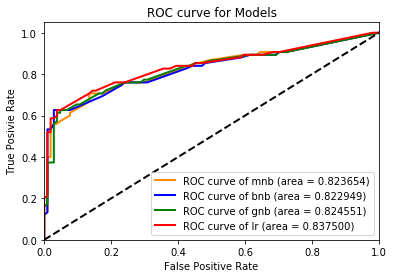

In [30]:
plt.figure()
plt.plot(fpr_mnb, tpr_mnb, color='darkorange',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('mnb', roc_auc_mnb))
plt.plot(fpr_bnb, tpr_bnb, color='blue',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('bnb', roc_auc_bnb))
plt.plot(fpr_gnb, tpr_gnb, color='green',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('gnb', roc_auc_gnb))
plt.plot(fpr_lr, tpr_lr, color='red',
        lw=2, label='ROC curve of {} (area = {:.6f})'.format('lr', roc_auc_lr))
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Posivie Rate')
plt.title('ROC curve for Models')
plt.legend(loc='lower right')
plt.show()

In [31]:
using_metric(y_real, lr.predict(X_test), 'LogisticRegression')

Using LogisticRegression of Confusion matrix :
 [[88 16]
 [21 54]]

True Positive  : 54 False Negative : 21
False Positive : 16 True Negative  : 88

Accuracy    : 0.793 Precision : 0.771 Recall : 0.720
Specificity : 0.846 Fallout : 0.154


In [32]:
# 위에 있는 grid_search 함수 이용

parameters ={
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
}
grid_search(final_train_df_pre2, target, lr, parameters)

Best Parameter : {'C': 0.001, 'penalty': 'l2'}
Model Score : 0.8013468013468014


# Test Data 적용

In [33]:
final_clf_2 = LogisticRegression(C=0.001, penalty='l2')
final_clf_2.fit(final_train_df_pre2, target)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'],
                           'Survived' : final_clf_2.predict(final_test_df_pre2)})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [35]:
#submission.to_csv('Submission_2.csv', index=False)

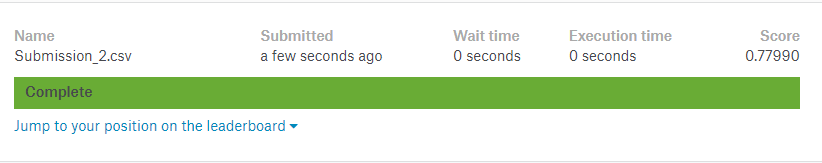